In [13]:
import numpy as np
import matplotlib.pyplot as plt

# pos = np.load('/Users/fizzausmani/Library/CloudStorage/Box-Box/Research/Python/Stability Analysis/CM T10000 N625 lattice sd1 isotropic continued pos.npy')[:,:,-1]
# p = np.load('/Users/fizzausmani/Library/CloudStorage/Box-Box/Research/Python/Stability Analysis/CM T10000 N625 lattice sd1 isotropic continued p.npy')[:,:,-1]
pos = np.load('/Users/fizzausmani/Library/CloudStorage/Box-Box/Research/Python/Stability Analysis/CM T10000 N625 lattice sd1 isotropic continued 2 pos.npy')[:,:,-1]
p = np.load('/Users/fizzausmani/Library/CloudStorage/Box-Box/Research/Python/Stability Analysis/CM T10000 N625 lattice sd1 isotropic continued 2 p.npy')[:,:,-1]
# pos_0001 = np.load('/Users/fizzausmani/Library/CloudStorage/Box-Box/Research/Python/Stability Analysis/CM T10000 N625 lattice sd0.01 isotropic continued 3 pos.npy')[:,:,-1]

mask = (pos[0, :] < 0) | (pos[1, :] < 0)

# Find the minimum x and y values for the positions that need adjustment
min_x = np.min(pos[0, mask])
min_y = np.min(pos[1, mask])

# Translate only the positions that need adjustment
pos[0, mask] -= min_x
pos[1, mask] -= min_y

In [14]:
N = pos.shape[1]
rfx=[]
rfy=[]

for i in range(0, N):
    origin = (pos[:, 0]) 
    origin = origin[:, np.newaxis]* np.ones([N])
    p_origin = (p[:, 0])
    p_origin = p_origin[:, np.newaxis] * np.ones([N])
    r = pos - origin
    x = np.dot(np.transpose(r), p_origin)
    x = x[:, 0]  
    rdotpp = p_origin*x
    y_vec = r - rdotpp
    # check = np.dot(np.transpose(rabs), p_origin)   
    y = np.sqrt(y_vec[0, :]**2 + y_vec[1, :]**2)
    rfx.append(np.abs(x))
    rfy.append(y)
    pos = np.roll(pos, 1, axis=1)
    p = np.roll(p, 1, axis=1)

rfx = np.array(rfx)
rfy = np.array(rfy)
rfx_reshaped = np.ravel(rfx)
rfy_reshaped = np.ravel(rfy)

# plt.scatter(rfy_reshaped, rfx_reshaped, s = 0.5, alpha = 0.5)
# plt.xlim(0,4)
# plt.ylim(0,4)

binedges_x = np.linspace(0, 4, 201)
binedges_y = np.linspace(0, 4, 201) 

x_indices = (rfx_reshaped//(binedges_x[1] - binedges_x[0]))
y_indices = (rfy_reshaped//(binedges_y[1] - binedges_y[0]))

rf_coords = np.array([rfx_reshaped, rfy_reshaped])
a = [rf_coords[0,:] < 4]
b = [rf_coords[1,:] < 4]
rf_coords = rf_coords*a*b
mask = (rf_coords != 0).all(axis=0)
rf_coords_filtered = rf_coords[:,mask]

x_indices = (rf_coords_filtered[0,:]//(binedges_x[1] - binedges_x[0]))
y_indices = (rf_coords_filtered[1,:]//(binedges_y[1] - binedges_y[0]))

bin_counts = np.zeros([len(binedges_x), len(binedges_y)])
for i in range(0,x_indices.shape[0]):
    bin_counts[int(x_indices[i]), int(y_indices[i])] += 1

# bin_counts = bin_counts/np.sum(bin_counts)
# bin_counts = bin_counts/(binedges_x[1]*binedges_y[1]*len(x_indices))

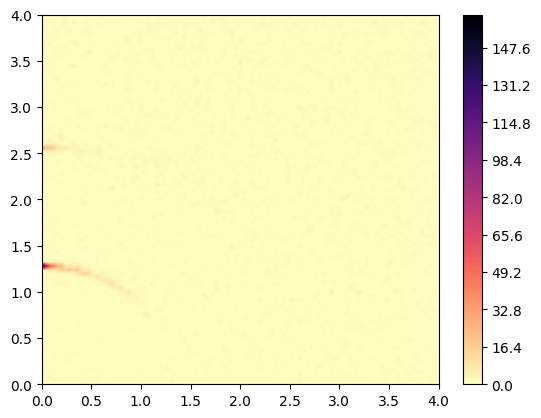

In [3]:
plt.contourf(binedges_x, binedges_y, bin_counts.T, levels = 500, cmap='magma_r')
plt.colorbar()

In [6]:
np.sum(bin_counts)

4703.0